<h2><center>Lab 3 - Logistic Regression</center><h2>
<h4><center>Submission by Chitrank Dave (8938766)</center></h4>

Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import iqr
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

---
#### Data Preprocessing Tasks
- 1. Detect and handle outliers for all the numerical features in the dataset using either
the Whiskers Approach, or Z-score approach.
- 2. If you feel it’s needed, normalize numerical features using appropriate method based
on feature characteristics.

In [2]:
# Load the dataset
cc_df = pd.read_csv(
    "../../practical_labs/datasets/creditcard.csv", )

In [3]:
print(cc_df.describe())
cc_df

                Time            V1            V2            V3            V4   
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9   
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  \
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
cc_df.shape

(284807, 31)

In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

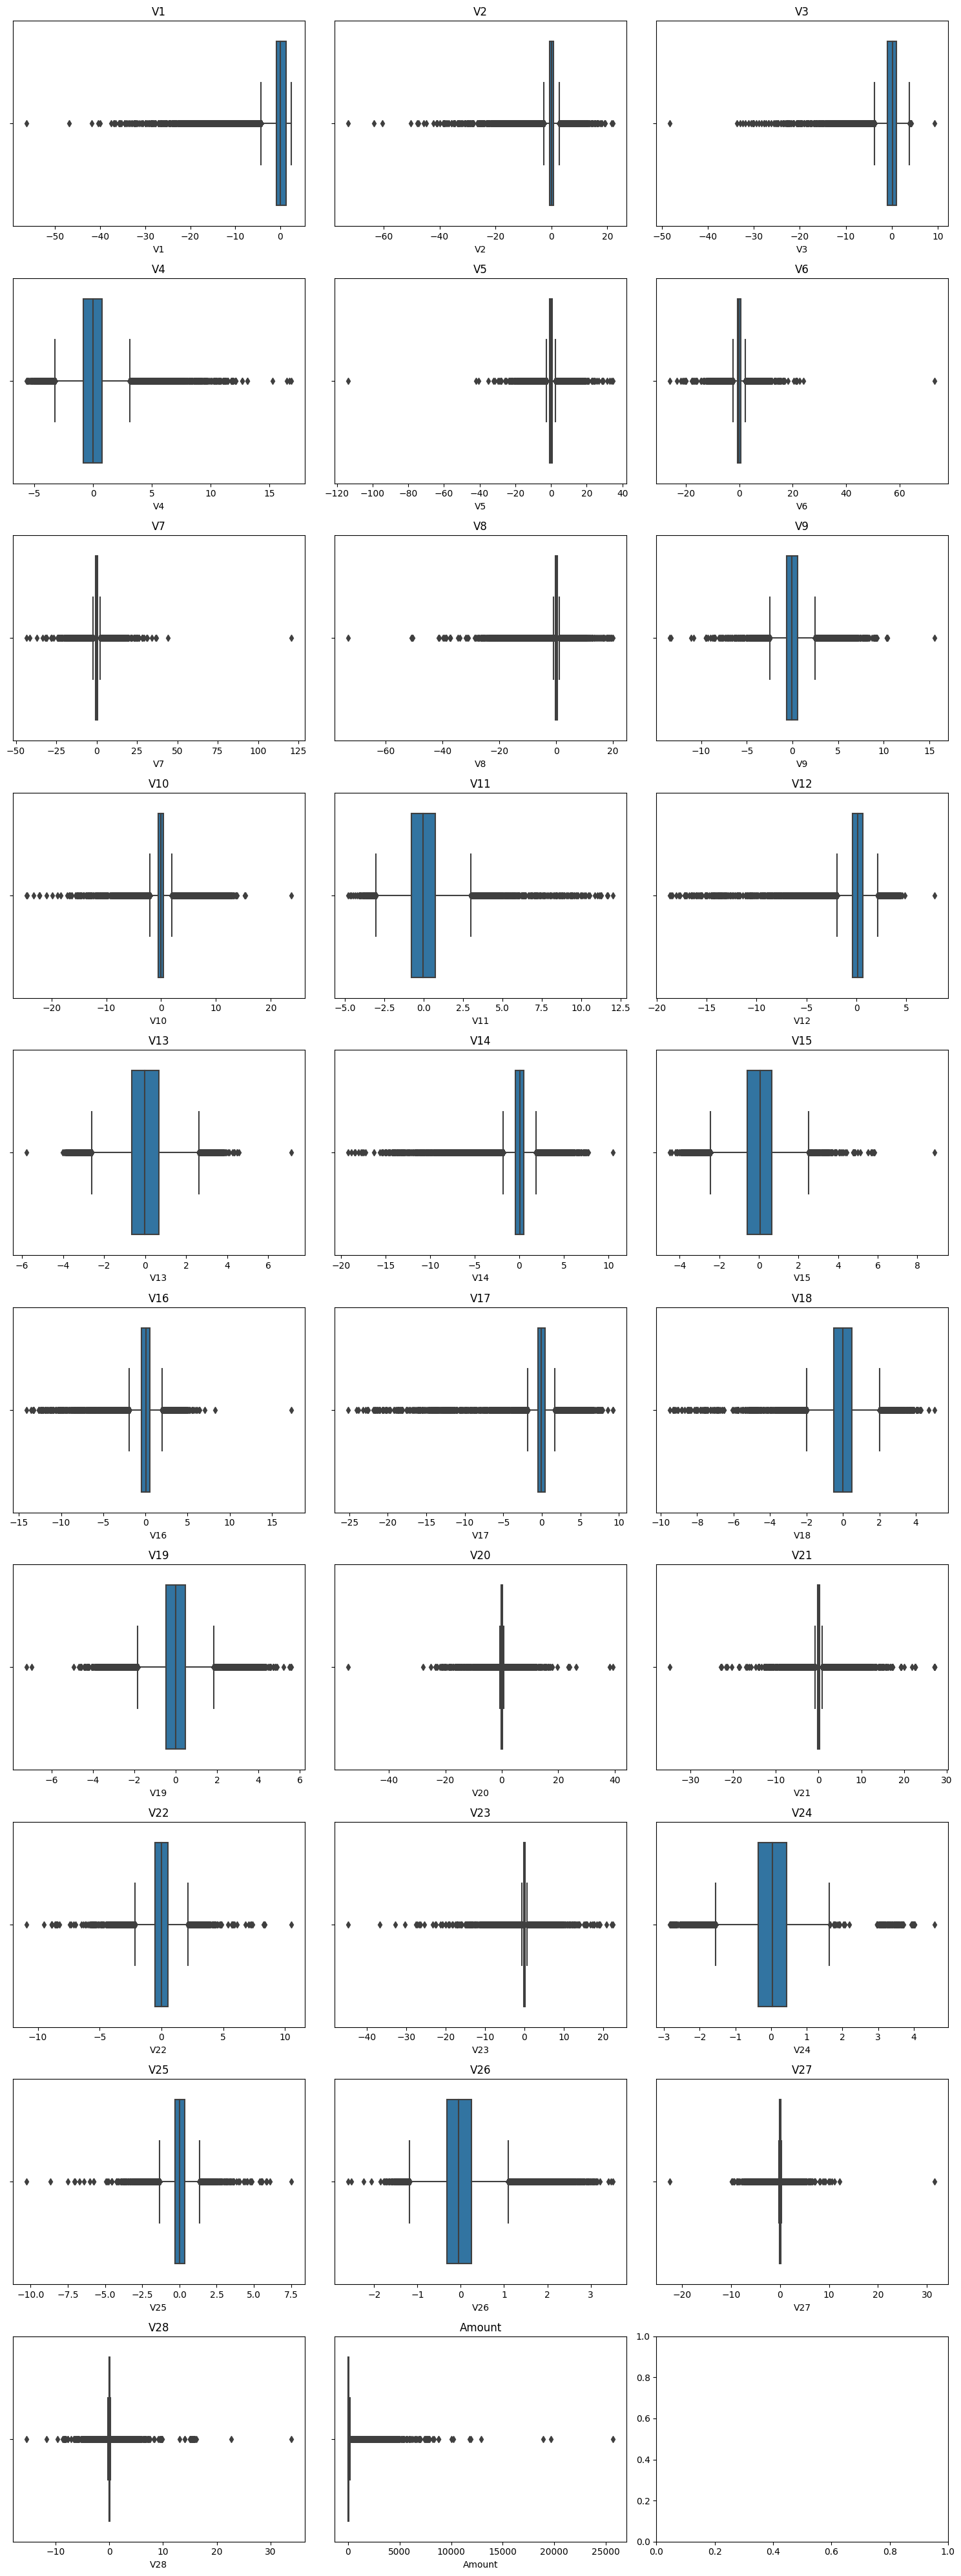

In [6]:
columns = cc_df.columns[1:-1]
num_columns = len(columns)

num_cols = 3
num_rows = (num_columns + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 40))
axes = axes.flatten()
for i, column in enumerate(columns):
    sns.boxplot(x=cc_df[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()

plt.show()


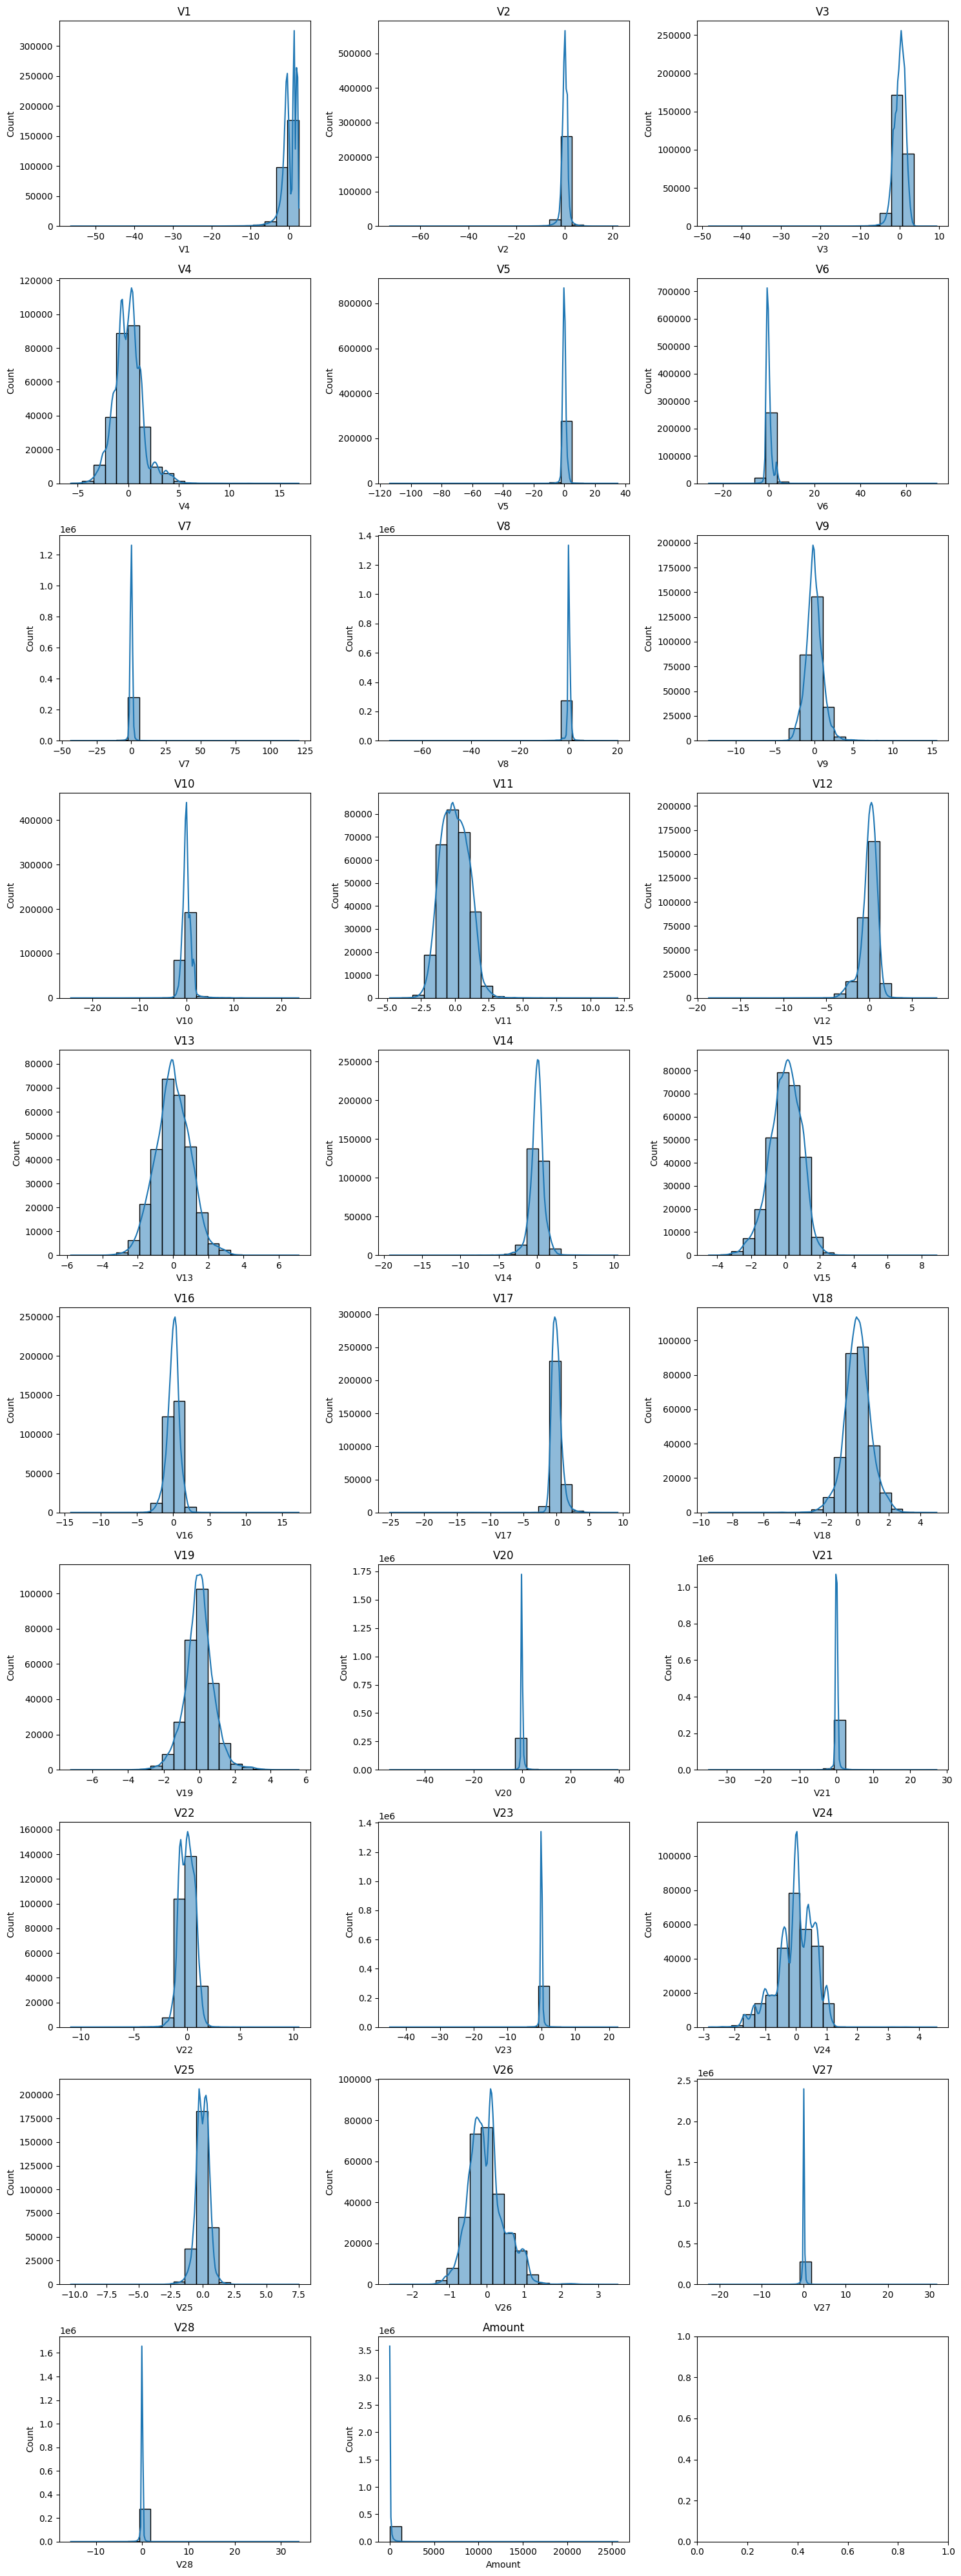

In [7]:
columns = cc_df.columns[1:-1]
num_columns = len(columns)
num_rows = (num_columns + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 40))
axes = axes.flatten()
for i, column in enumerate(columns):
    sns.histplot(x=cc_df[column], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [8]:
def remove_outliers(df, column):
    data = df[column]
    lower_bound = data.quantile(0.25) - 1.5 * iqr(data)
    upper_bound = data.quantile(0.75) + 1.5 * iqr(data)
    return df[(data >= lower_bound) & (data <= upper_bound)]

In [9]:
data_IQR = cc_df.copy()
for column in cc_df.columns[:-1]:
    data_IQR = remove_outliers(data_IQR, column)

data_IQR.reset_index(drop=True, inplace=True)

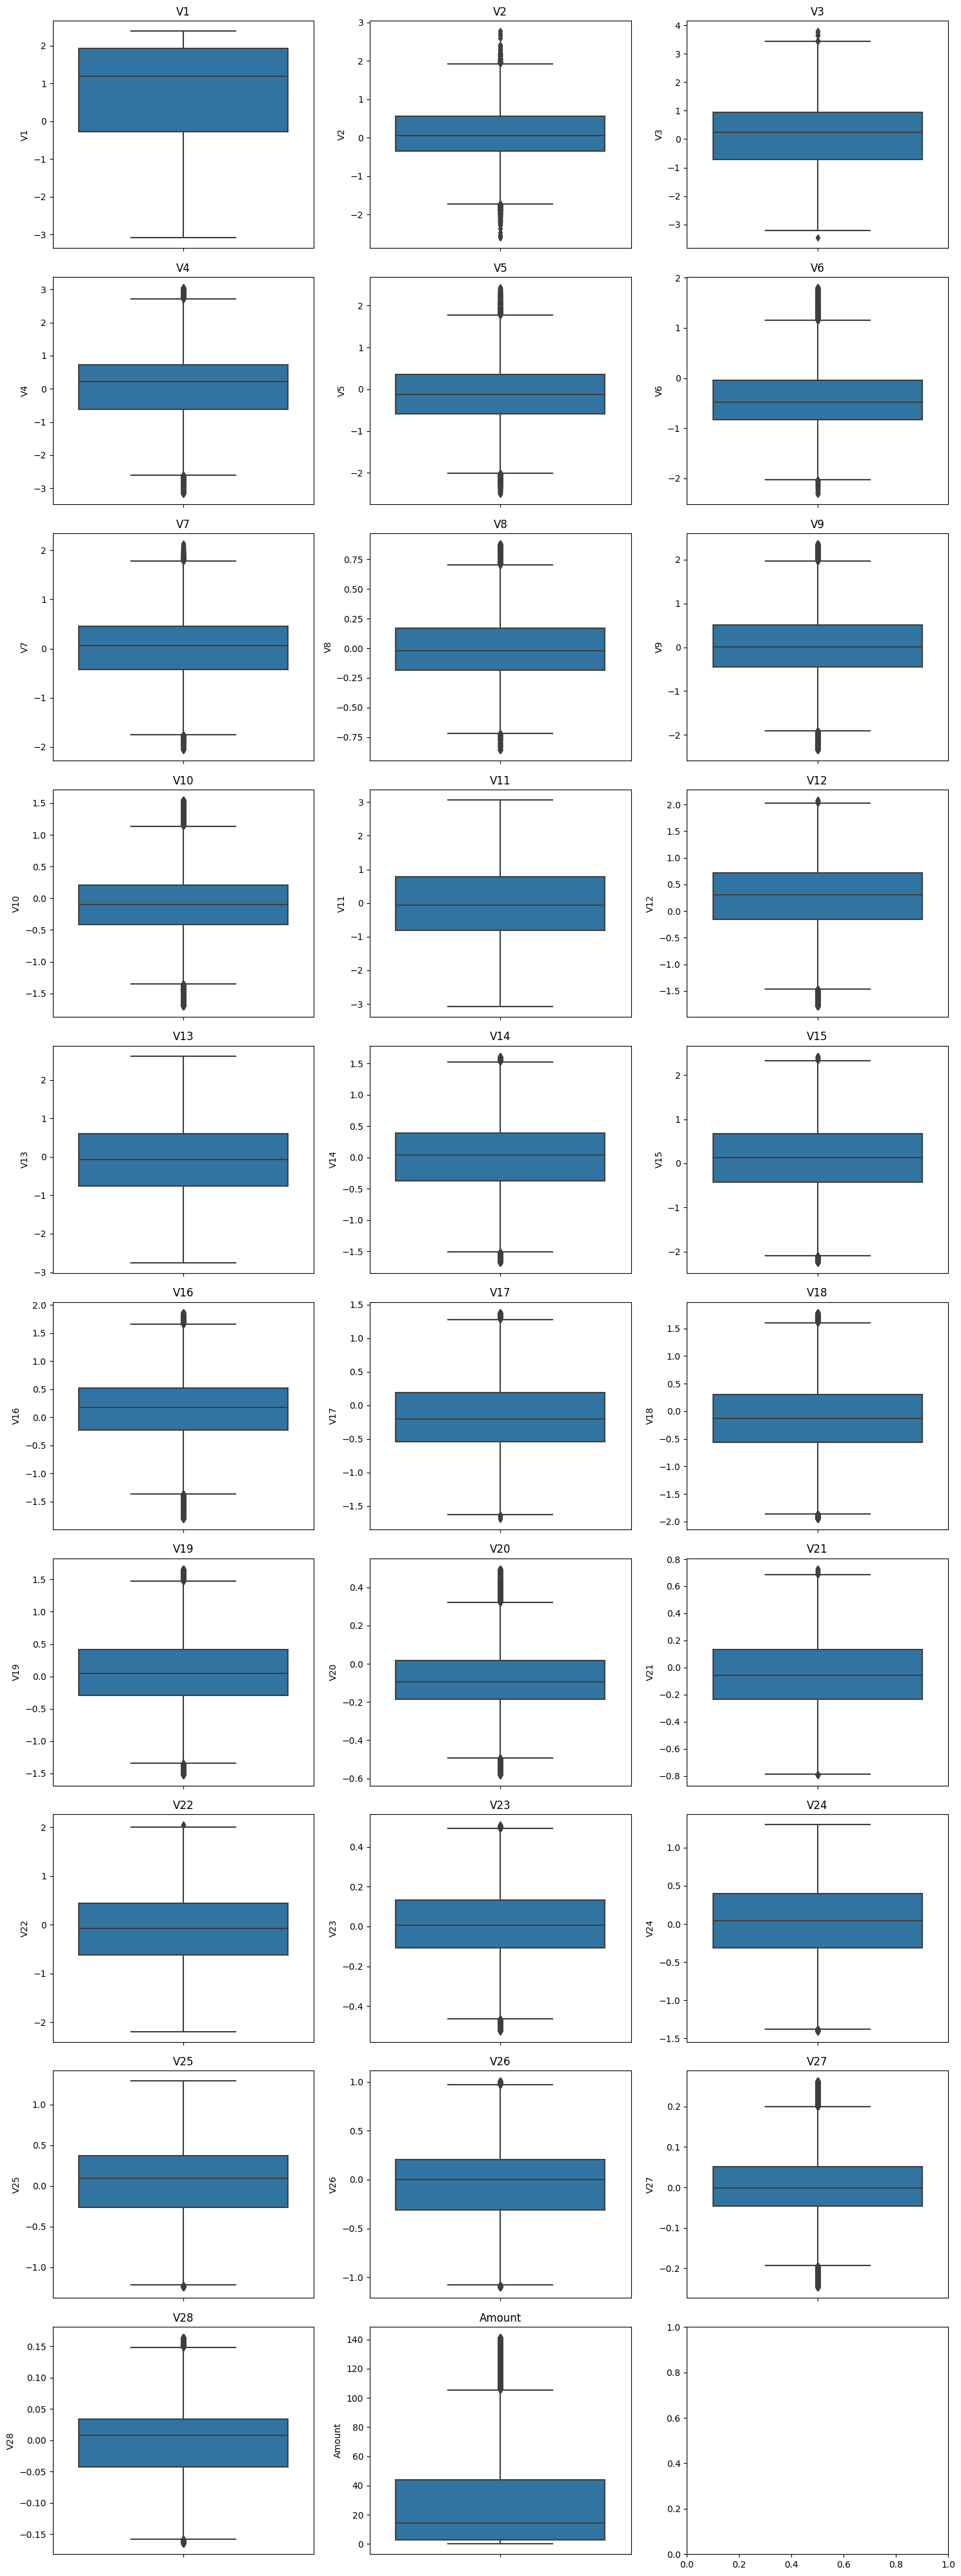

In [10]:
columns = data_IQR.columns[1:-1]
num_columns = len(columns)

num_rows = (num_columns + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 40))
axes = axes.flatten()
for i, column in enumerate(columns):
    sns.boxplot(y=data_IQR[column], ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

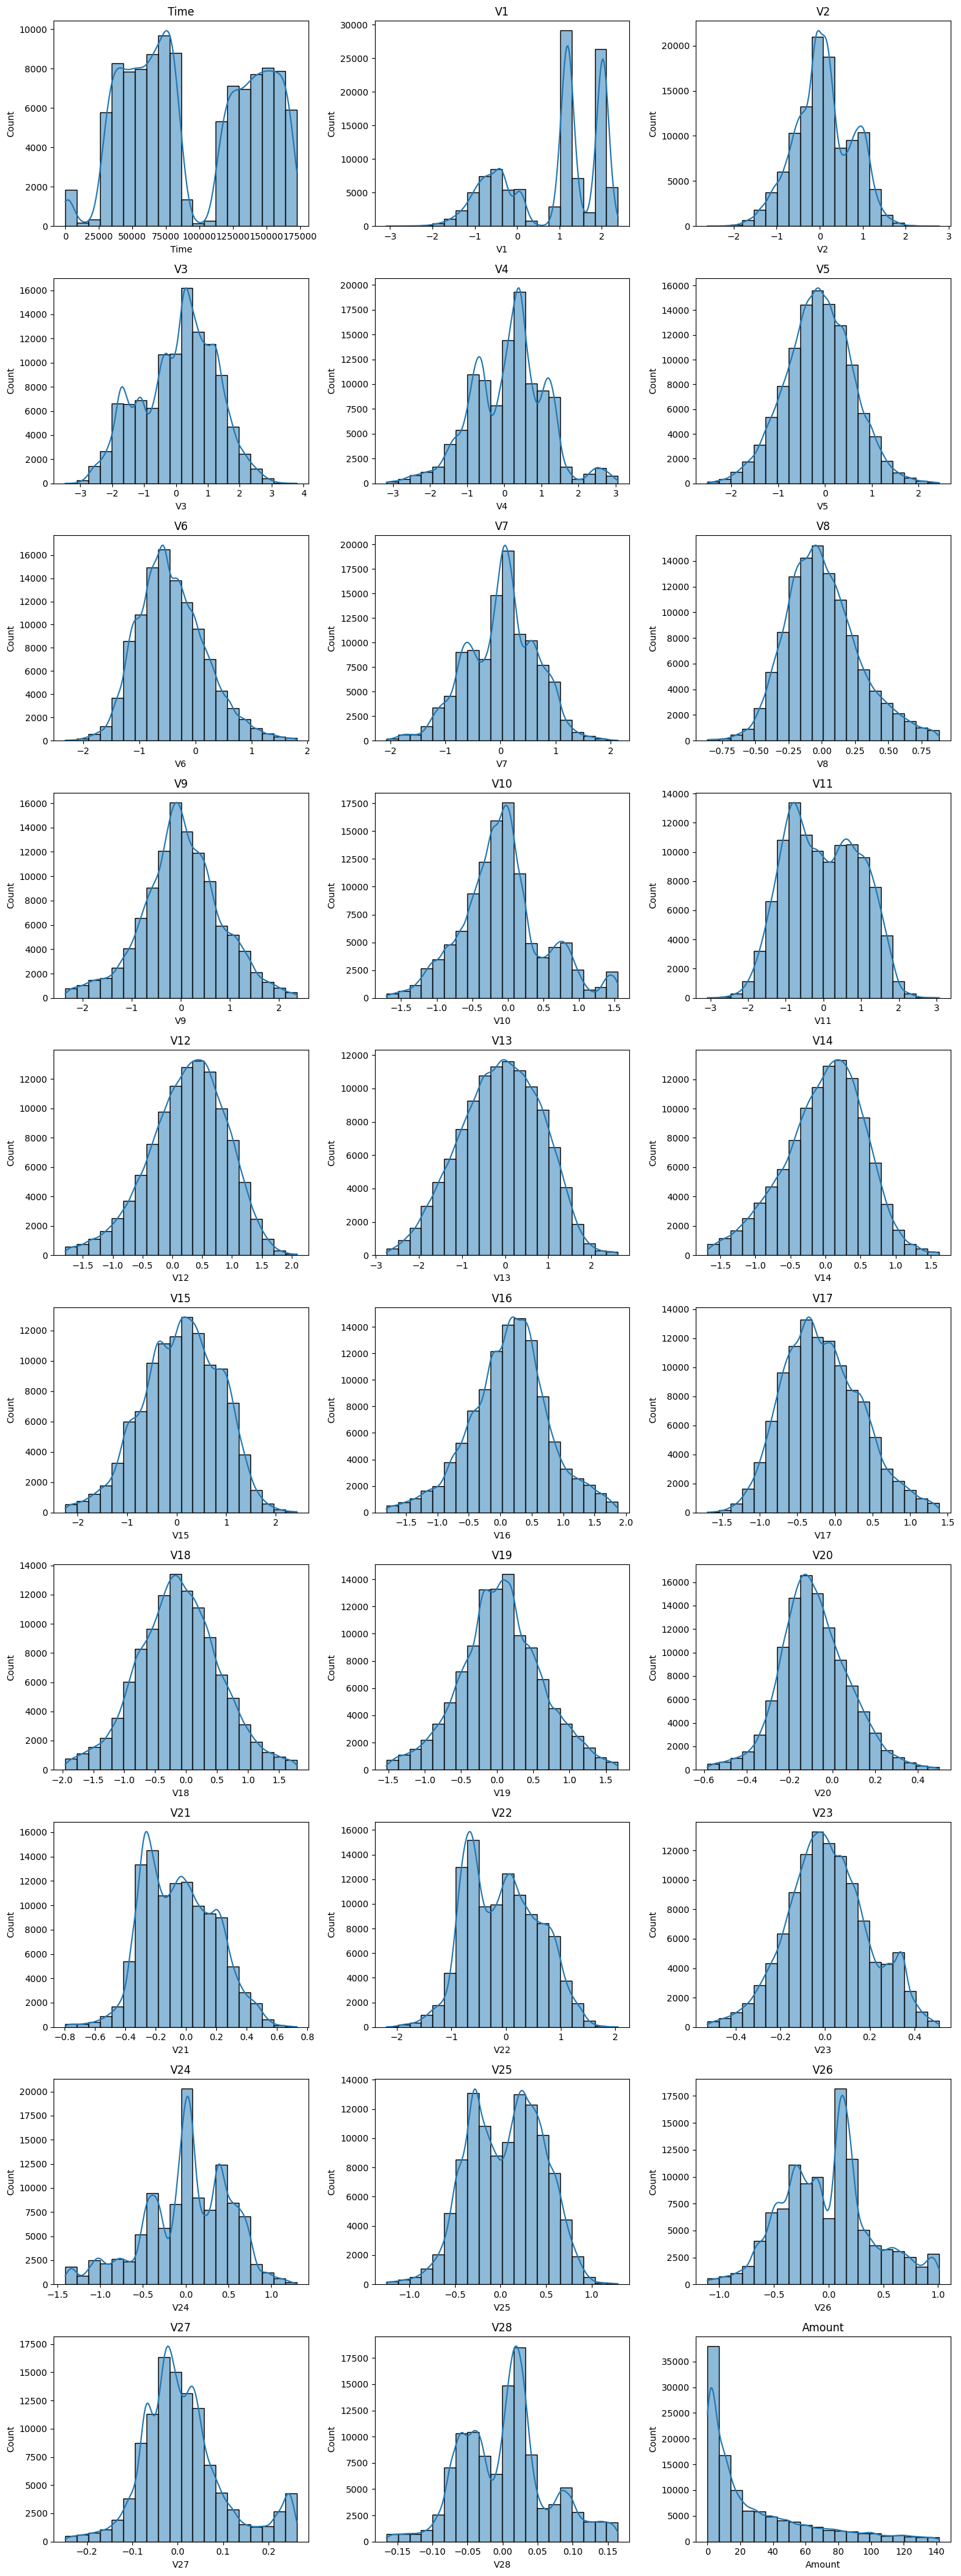

In [11]:
columns = data_IQR.columns[:-1]
num_columns = len(columns)

num_rows = (num_columns + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 40))
axes = axes.flatten()
for i, column in enumerate(columns):
    sns.histplot(x=data_IQR[column], kde=True, bins=20, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [12]:
data_IQR.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,...,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000,110122.000000
mean,95421.730072,0.854177,0.083591,0.080798,0.114820,-0.125154,-0.418480,0.018928,0.008797,0.023899,...,-0.044932,-0.065412,0.015406,0.015542,0.060088,-0.014347,0.011951,0.003600,28.902696,0.000118
std,46682.216996,1.110730,0.672933,1.167053,0.989382,0.714049,0.599903,0.631672,0.276866,0.799484,...,0.234660,0.658575,0.183805,0.501912,0.403291,0.409419,0.092904,0.061184,33.564976,0.010865
min,0.000000,-3.087106,-2.611287,-3.469030,-3.178091,-2.508760,-2.316707,-2.070343,-0.861235,-2.351125,...,-0.795202,-2.189110,-0.527654,-1.407372,-1.251743,-1.107366,-0.247754,-0.165501,0.000000,0.000000
25%,55262.250000,-0.278425,-0.355491,-0.725006,-0.613637,-0.588356,-0.836254,-0.430798,-0.184335,-0.453097,...,-0.236335,-0.619030,-0.105987,-0.315086,-0.265272,-0.309655,-0.046362,-0.043019,2.970000,0.000000
50%,80973.000000,1.182459,0.055995,0.232293,0.218241,-0.123154,-0.481857,0.060031,-0.019492,0.004328,...,-0.057524,-0.081260,0.006547,0.040610,0.088542,-0.001811,-0.001818,0.008500,14.480000,0.000000
75%,140449.000000,1.930616,0.559318,0.940644,0.717100,0.357663,-0.041538,0.453974,0.171165,0.514840,...,0.132052,0.436925,0.132845,0.394141,0.370420,0.203036,0.051829,0.033658,44.000000,0.000000
max,172785.000000,2.379970,2.775110,3.790995,3.060921,2.433526,1.809233,2.132937,0.881887,2.365008,...,0.730670,2.049508,0.510510,1.299212,1.287646,1.008886,0.262850,0.164505,141.510000,1.000000


In [13]:
scaler = StandardScaler()
data_IQR[['Time','Amount']] = scaler.fit_transform(data_IQR[['Time','Amount']])
data_IQR

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-2.044080,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.780957,0
1,-2.044037,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.751760,0
2,-2.043994,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.712433,0
3,-2.043887,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.751462,0
4,-2.043865,1.249999,-1.221637,0.383930,-1.234899,-1.485419,-0.753230,-0.689405,-0.227487,-2.094011,...,-0.231809,-0.483285,0.084668,0.392831,0.161135,-0.354990,0.026416,0.042422,2.758760,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110117,1.657068,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,-0.834585,0
110118,1.657133,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.926485,0
110119,1.657175,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.697537,0
110120,1.657218,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.781255,0


---
#### Descriptive Analytics Tasks
- 1. Analyze the distribution of fraud vs non-fraud transactions and comment on it.


In [14]:
data_IQR.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,0.000070,0.854230,0.083531,0.080770,0.114745,-0.125202,-0.418485,0.018886,0.008799,0.023935,...,-0.082563,-0.044934,-0.065413,0.015420,0.015548,0.060072,-0.014328,0.011952,0.003598,-9.321286e-07
1,-0.591879,0.407266,0.593504,0.311548,0.746515,0.283957,-0.376619,0.370476,-0.006795,-0.285242,...,-0.061329,-0.030744,-0.056383,-0.108184,-0.038007,0.191077,-0.173712,0.005996,0.018210,7.895057e-03


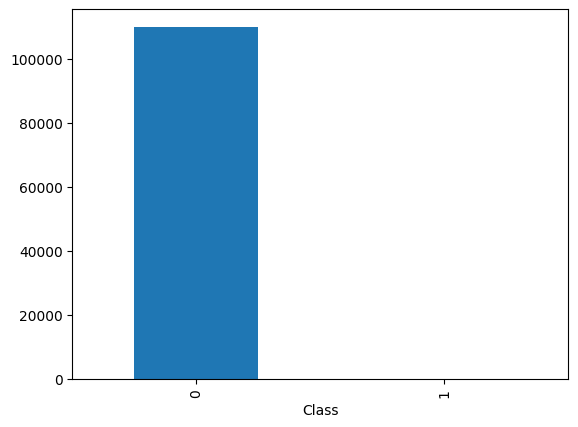

In [15]:
class_counts = data_IQR['Class'].value_counts()
class_counts.plot(kind='bar')
plt.show()

In [16]:
def analyze_transaction_balance(df):
    class_counts = df['Class'].value_counts()

    total_fraud = class_counts.get(1, 0)
    total_non_fraud = class_counts.get(0, 0)

    print(f"Total Fraud Transactions: {total_fraud}")
    print(f"Total Non-Fraud Transactions: {total_non_fraud}")

    if total_fraud > total_non_fraud:
        print("There are more fraud transactions.")
    elif total_fraud < total_non_fraud:
        print("There are more non-fraud transactions.")
    else:
        print("Fraud and non-fraud transactions are balanced.")


analyze_transaction_balance(cc_df)

Total Fraud Transactions: 492
Total Non-Fraud Transactions: 284315
There are more non-fraud transactions.


`The count of non-fraudulent transactions greatly exceeds that of fraudulent transactions.`


- 2. Analyze the correlation between fraud/non-fraud transactions and all the other
numerical features.

In [17]:
class_corr = data_IQR.corr().iloc[:, -1].sort_values(ascending=False)
best_features = class_corr.abs().nlargest(11).index
best_features

Index(['Class', 'V14', 'V17', 'V2', 'V23', 'V4', 'V19', 'Time', 'V5', 'V10',
       'V7'],
      dtype='object')

`The above features are having the strongest correlation with the target variable 'Class' based on their absolute correlation values`

- 3. From the previous step, choose the 10 features with highest correlation with the
target variable, and plot their distributions against the fraud/non-fraud transactions.

<Figure size 1500x1500 with 0 Axes>

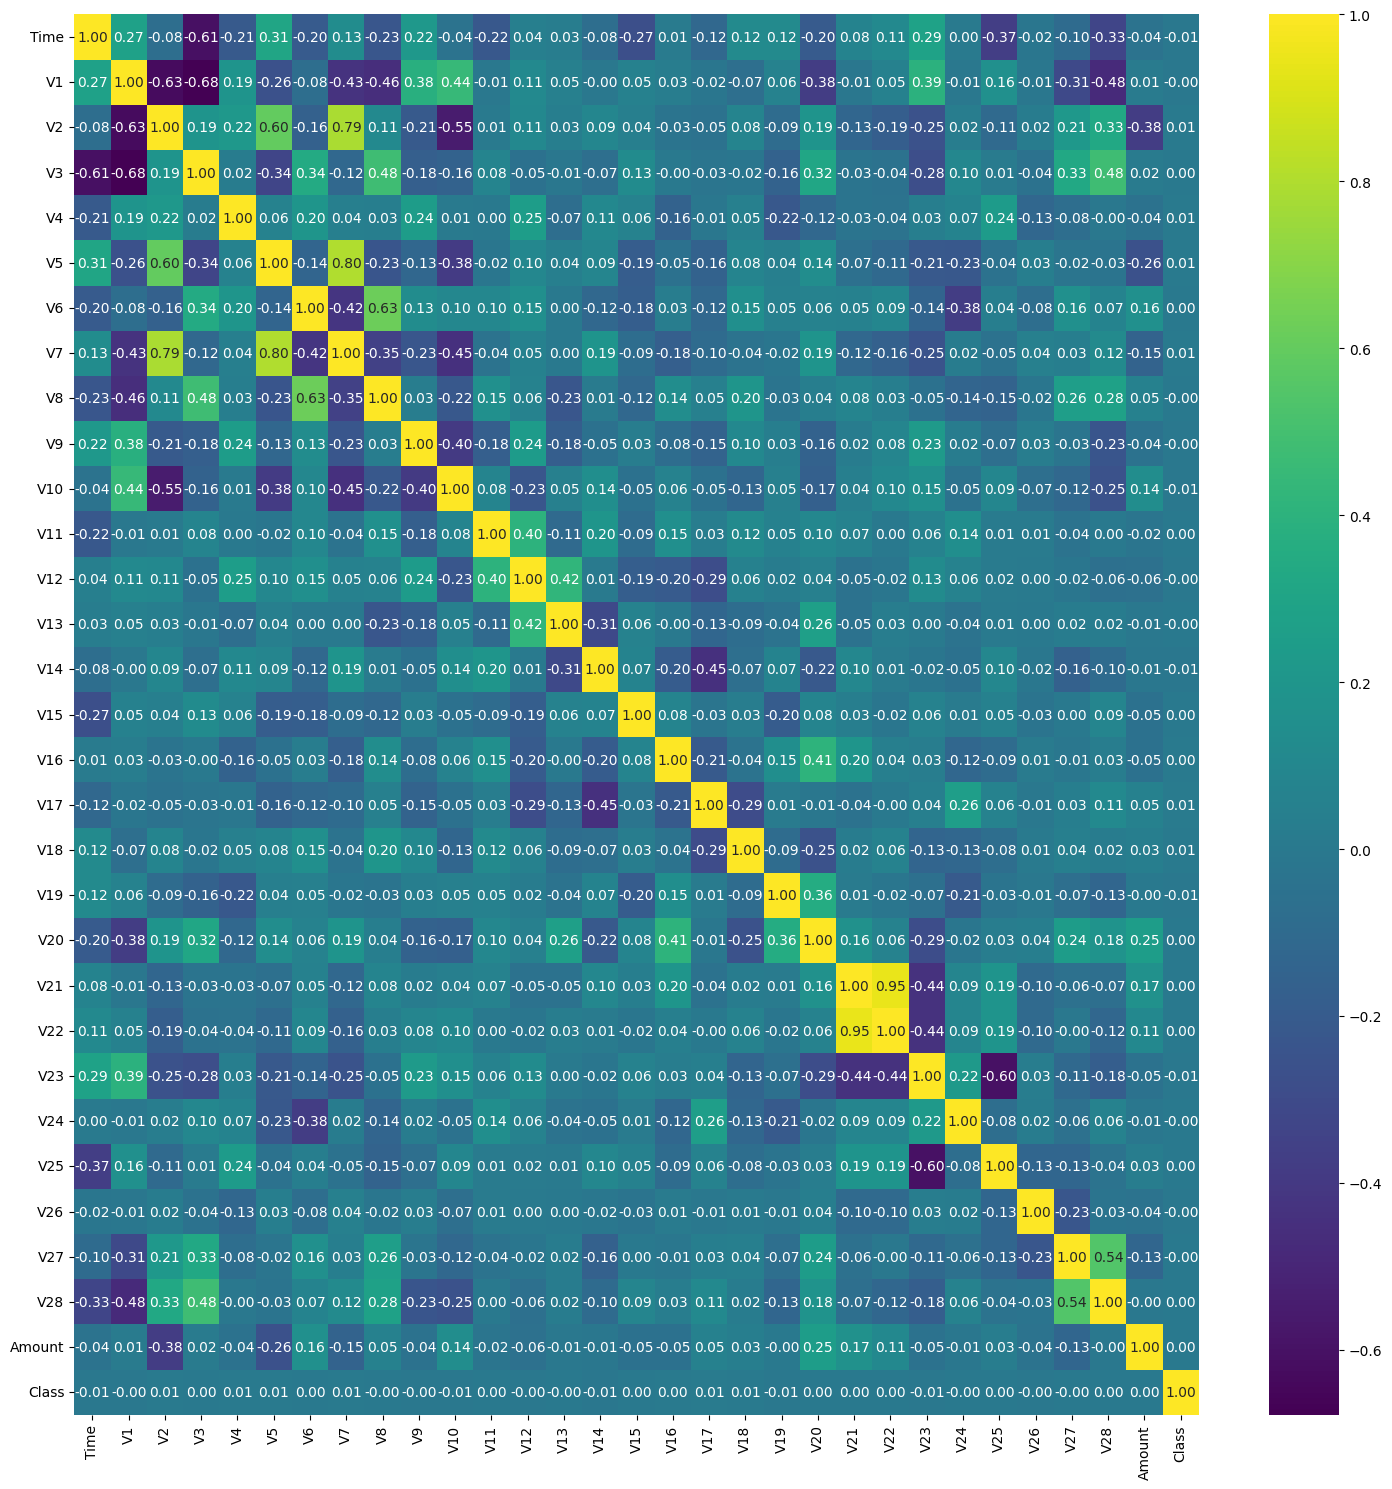

In [18]:
plt.figure(figsize=[15, 15])
fig, ax = plt.subplots(figsize=[15, 15])
sns.heatmap(data_IQR.corr(), cmap='viridis', annot=True, fmt=".2f", cbar=True, ax=ax)
plt.tight_layout()
plt.show()


In [19]:
data_IQR['Class'].value_counts()

Class
0    110109
1        13
Name: count, dtype: int64

In [20]:
data_IQR[best_features].pivot_table(columns='Class', aggfunc='count')


Class,0,1
Time,110109,13
V10,110109,13
V14,110109,13
V17,110109,13
V19,110109,13
V2,110109,13
V23,110109,13
V4,110109,13
V5,110109,13
V7,110109,13


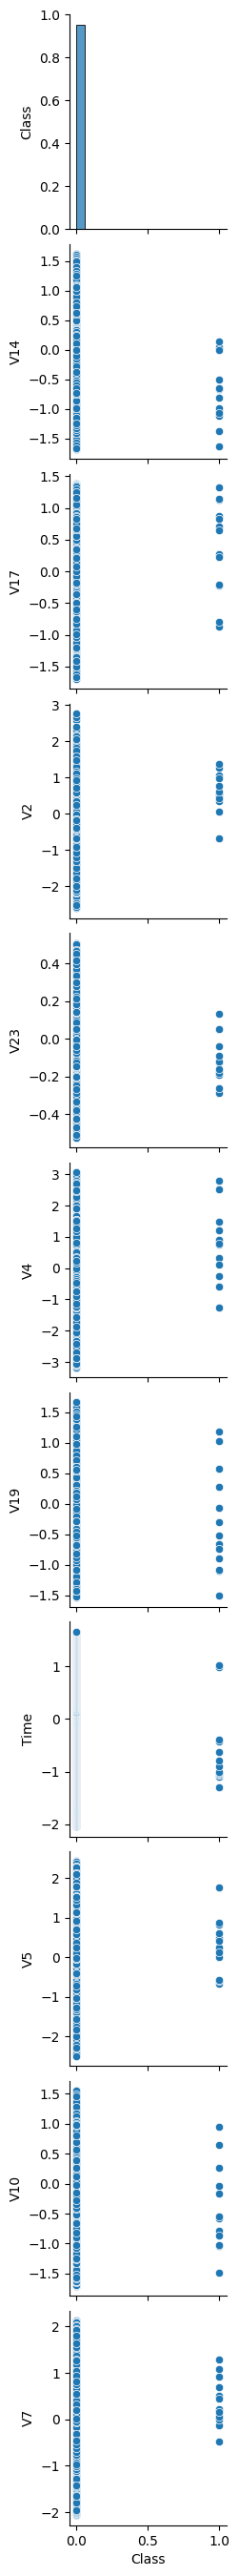

In [21]:
sns.pairplot(data= data_IQR[best_features] , x_vars='Class')

---
##### ML Model Training and Testing Tasks
- 1. Split the cleaned data into training and testing sets (e.g., 80% training, 20% testing).
- 2. Use 5-fold cross-validation to train and validate the performance of all the models in this section.
- 3. Train a logistic regression model as a baseline model.
- 4. Print the learned coefficients (weights) of the model.
        a. Comment on which feature the model gave higher weight to in the weight vector.
- 5. Evaluate the model's performance on the test set using the following metrics:
       - a. Accuracy
       - b. Precision
       - c. Recall
       - d. F1-Score

- 6. Plot the ROC Curve and print the AUC of the model on the test set. Comment on the
quality of the model performance as seen in the ROC curve.
- 7. Apply a well-known technique to handle class imbalance and compare the model
performance on the test set with and without this approach. Comment on your outcome.
- 8. Try the KNN and SVM classification compare their performance to the logistic
regression baseline.

In [22]:
X = data_IQR.drop('Class', axis=1)
y = data_IQR['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [23]:
LR_model = LogisticRegression(max_iter=1000)
knn_model = KNeighborsClassifier(n_neighbors=2)
svm_model = SVC()

models = {
    'Logistic Regression': LR_model,
    'K-Nearest Neighbors': knn_model,
    'Support Vector Machine': svm_model
}

In [24]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1_score': make_scorer(f1_score)
}


In [25]:
LR_model.fit(X_train, y_train)
y_pred = LR_model.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[22024,     0],
       [    1,     0]])

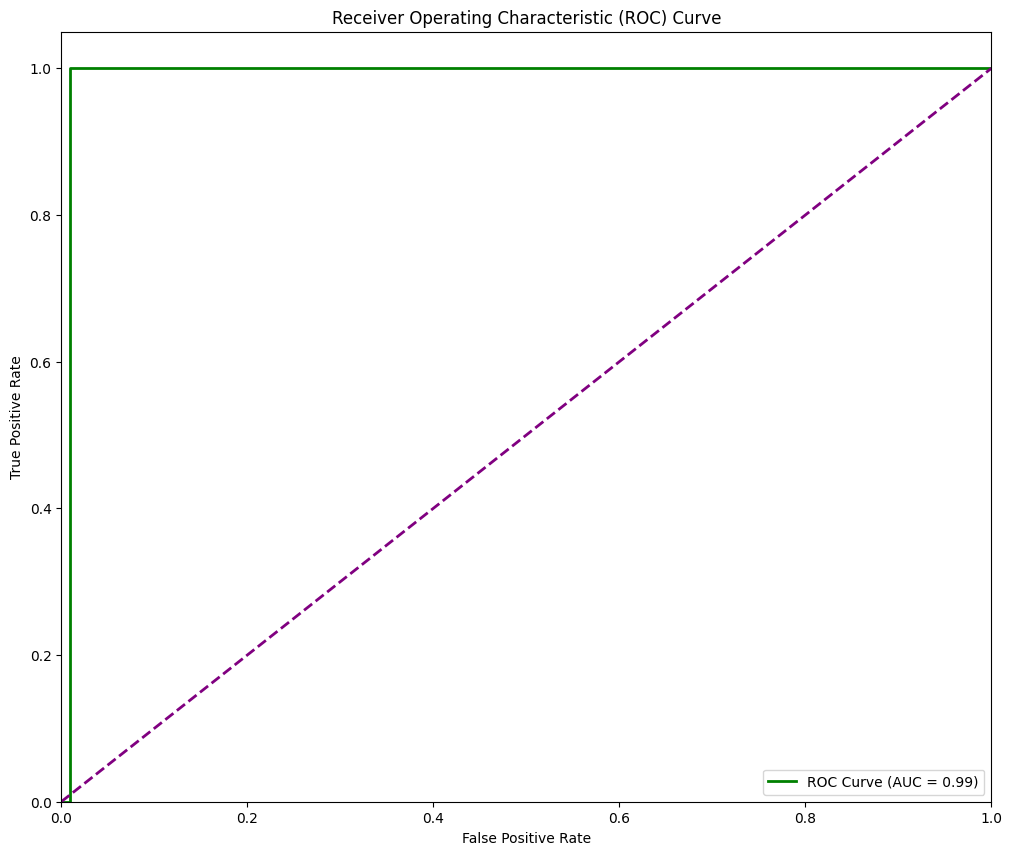

In [26]:
y_prob = LR_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = auc(fpr, tpr)

plt.figure(figsize=(12, 10))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')  # Change the line color to green
plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')  # Change the diagonal line color to purple
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [27]:
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[22024,     0],
       [    1,     0]])

In [28]:
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

confusion_matrix(y_test,y_pred)

array([[22024,     0],
       [    1,     0]])

In [29]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=2)

pipeline = Pipeline([
    ('smote', smote),
    ('model', knn_model)
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [30]:
confusion_matrix(y_test,y_pred)

array([[22018,     6],
       [    1,     0]])

In [31]:
accuracy_score(y_test,y_pred)

0.9996821793416573

In [32]:
precision_score(y_pred,y_test), recall_score(y_pred,y_test) , f1_score(y_pred,y_test)

(0.0, 0.0, 0.0)

In [33]:
cross_validate(svm_model, X_train, y_train,cv=5,scoring=scoring,n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    3.0s remaining:    4.6s
/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: Undefined

[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   1.2s


{'fit_time': array([0.93113899, 0.86154509, 0.86244583, 0.93741107, 0.91433883]),
 'score_time': array([0.28684092, 0.30245996, 0.323524  , 0.28430176, 0.27932787]),
 'test_accuracy': array([0.99982974, 0.99982974, 0.99988649, 0.99988649, 0.99988649]),
 'test_precision': array([0., 0., 0., 0., 0.]),
 'test_recall': array([0., 0., 0., 0., 0.]),
 'test_f1_score': array([0., 0., 0., 0., 0.])}

In [34]:
scores={}

In [35]:
def imbalance_model_evaluation(models:dict)->pd.DataFrame:
        for name in models.keys():
                print(name)
                scores[name] = cross_validate(models[name], X_train, y_train, 
                                cv=5,
                                scoring = scoring, 
                                n_jobs=-1, 
                                verbose=2)
        scores_df = pd.DataFrame(scores)
        scores_df

        for c,col in enumerate(scores_df):
                for idx,row in enumerate(scores_df[col]):
                        scores_df.iloc[idx,c] = scores_df.iloc[idx,c].mean()
        scores_df = scores_df.T
        
        return scores_df[['test_accuracy','test_precision','test_recall','test_f1_score']]

In [36]:
imbalance_model_evaluation(models)


Logistic Regression


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.3s remaining:    0.4s
/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: Undefined

[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s


/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.1s finished


[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
K-Nearest Neighbors


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted 

[CV] END .................................................... total time=  12.5s
[CV] END .................................................... total time=  12.5s
[CV] END .................................................... total time=  12.6s
[CV] END .................................................... total time=  12.5s


/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=  12.2s
Support Vector Machine


/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
/Users/chitrankdave/Learn/courses/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predi

[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   1.3s
[CV] END .................................................... total time=   1.3s
[CV] END .................................................... total time=   1.3s
[CV] END .................................................... total time=   1.3s


,test_accuracy,test_precision,test_recall,test_f1_score
Logistic Regression,0.999864,0.0,0.0,0.0
K-Nearest Neighbors,0.999864,0.0,0.0,0.0
Support Vector Machine,0.999864,0.0,0.0,0.0


In [37]:
def balance_model_evaluation(models:dict)->pd.DataFrame:
        for name in models.keys():
                print(name)
                pipeline = Pipeline([
                                ('smote', SMOTE(sampling_strategy='all', random_state=42)),
                                ('model', models[name])
                                ])
                scores[name] = cross_validate(pipeline, X_train, y_train, 
                                cv=5,
                                scoring = scoring, 
                                n_jobs=-1, 
                                verbose=2)
        scores_df = pd.DataFrame(scores)
        scores_df

        for c,col in enumerate(scores_df):
                for idx,row in enumerate(scores_df[col]):
                        scores_df.iloc[idx,c] = scores_df.iloc[idx,c].mean()
        scores_df = scores_df.T
        
        return scores_df[['test_accuracy','test_precision','test_recall','test_f1_score']]
        

In [38]:
balance_model_evaluation(models)

Logistic Regression


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=   7.2s
[CV] END .................................................... total time=   8.0s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    8.2s remaining:   12.3s


[CV] END .................................................... total time=   8.6s
[CV] END .................................................... total time=   8.6s
[CV] END .................................................... total time=   8.9s
K-Nearest Neighbors


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    9.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=  22.4s
[CV] END .................................................... total time=  22.4s
[CV] END .................................................... total time=  22.4s
[CV] END .................................................... total time=  22.4s
[CV] END .................................................... total time=  22.5s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   22.5s remaining:   33.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   22.6s finished


Support Vector Machine


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


[CV] END .................................................... total time=  54.0s
[CV] END .................................................... total time=  58.7s


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   58.7s remaining:  1.5min


[CV] END .................................................... total time= 1.1min
[CV] END .................................................... total time= 1.1min
[CV] END .................................................... total time= 1.1min


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  1.1min finished


,test_accuracy,test_precision,test_recall,test_f1_score
Logistic Regression,0.930532,0.000493,0.266667,0.000983
K-Nearest Neighbors,0.999637,0.0,0.0,0.0
Support Vector Machine,0.998865,0.0,0.0,0.0


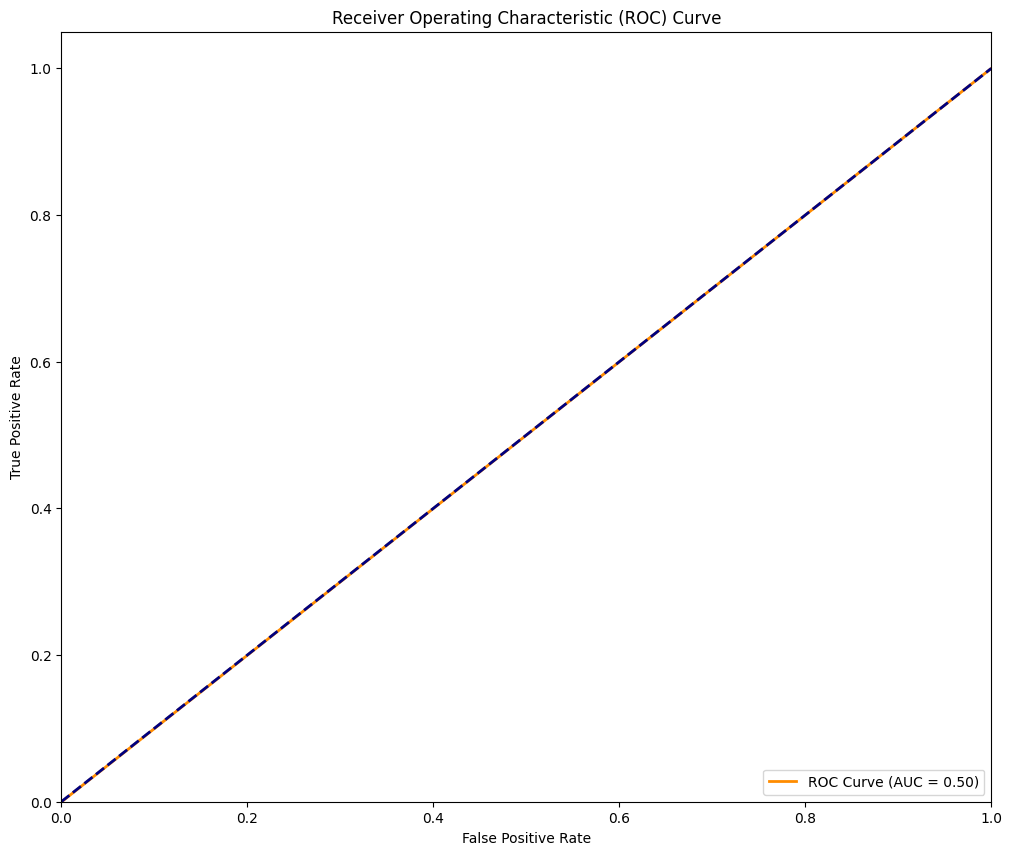

In [40]:
y_prob = pipeline.predict_proba(X_test)[:, 1]  

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

auc_score = auc(fpr, tpr)

plt.figure(figsize=(12, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()